# Transforming the images scipy.convolved2d
[reference1](https://techacademy.jp/magazine/26420), [reference2](https://techacademy.jp/magazine/24017)
<div>
<img src="https://magazine-cf.techacademy.jp/wp-content/uploads/2019/12/22231614/442-1.gif" width="240" height="240" align="left"/>
</div>
<div>
<img src="https://magazine-cf.techacademy.jp/wp-content/uploads/2019/11/23115243/268-2.gif" width="240" height="240" align="center"/>
</div><br>

[scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html#scipy.signal.convolve2d)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from copy import deepcopy
from scipy import signal
%matplotlib inline

In [2]:
# 畳み込み演算を行ってみる
from scipy import signal
n = 8
input_ = np.arange(n**2).reshape(n, -1)
input_

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [3]:
kernel_ = np.array([[1, 1, 1], [1, 5, 1], [1, 1, 1]])
kernel_

array([[1, 1, 1],
       [1, 5, 1],
       [1, 1, 1]])

In [4]:
output_ = signal.convolve2d(input_, kernel_, mode='valid')
output_

array([[117, 130, 143, 156, 169, 182],
       [221, 234, 247, 260, 273, 286],
       [325, 338, 351, 364, 377, 390],
       [429, 442, 455, 468, 481, 494],
       [533, 546, 559, 572, 585, 598],
       [637, 650, 663, 676, 689, 702]])

In [5]:
output_00 = (input_[0:3, 0:3] * kernel_).sum()
output_00

117

In [6]:
output_22 = (input_[2:5, 2:5] * kernel_).sum()
output_22

351

## plot_examples

In [7]:
def satellite(array):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(array)
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    x, y = np.meshgrid(np.arange(array.shape[0]), np.arange(array.shape[1]))
    ax.plot_wireframe(x, y, array)
    plt.show()

In [8]:
pixel = 31
neutral_array = np.zeros(pixel)
a = np.zeros(pixel)
for i in range(pixel//2):
    a[i+1:-(i+1)] += 1
    neutral_array = np.vstack([neutral_array, a])
neutral_array = np.minimum(np.vstack([neutral_array, np.flipud(neutral_array)[1:]]), pixel / 2 * 0.6)

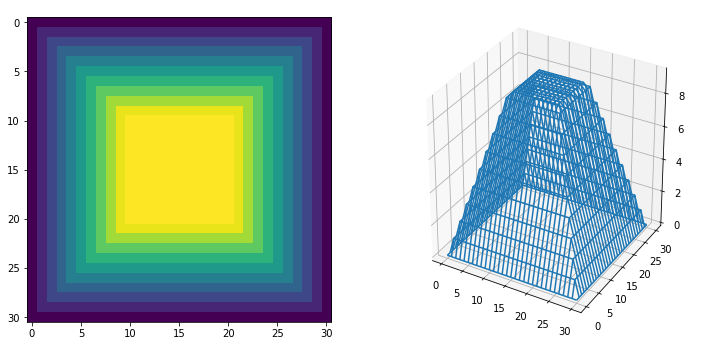

In [9]:
# neutral
satellite(neutral_array)

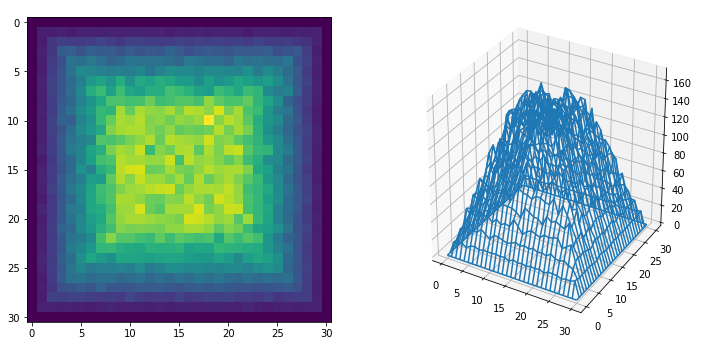

In [10]:
# noise
noise_array = neutral_array * np.random.normal(pixel / 2, 1, (pixel, pixel))
satellite(noise_array)

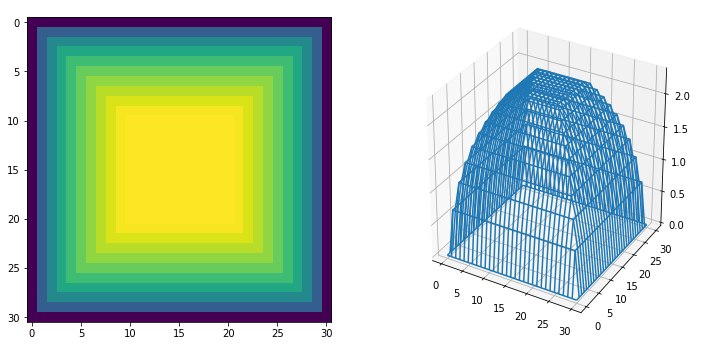

In [11]:
# log
log_array = np.log(neutral_array+1)
satellite(log_array)

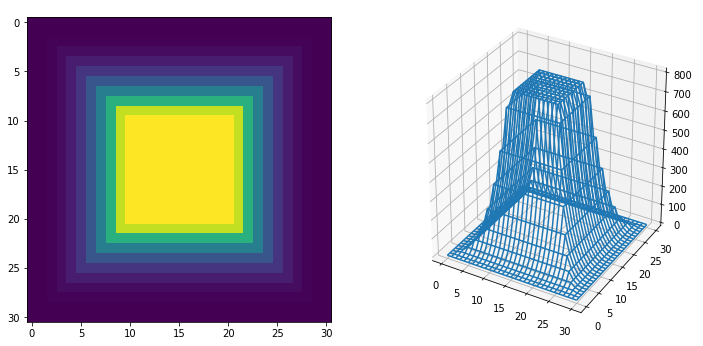

In [12]:
# exp
exp_array = np.power(neutral_array, 3)
satellite(exp_array)

In [13]:
smooth = np.array([[1,1,1],[1,5,1],[1,1,1]])
xder = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
yder = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
xder2 = np.array([[-1,2,-1],[-3,6,-3],[-1,2,-1]])
yder2 = np.array([[-1,-3,-1],[2,6,2],[-1,-3,-1]])

### Smoothing

- 画像の各ピクセル毎によせる

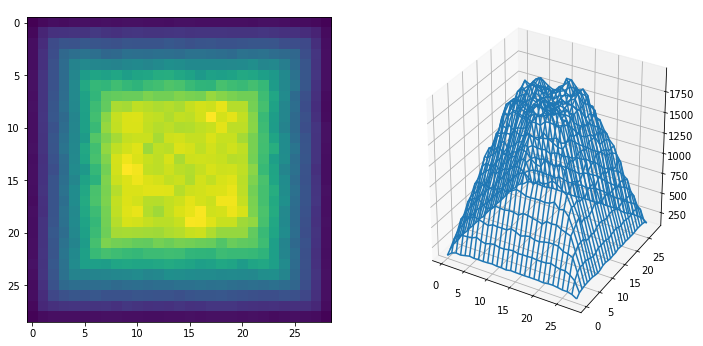

In [14]:
# noise
smooth_convolve = signal.convolve2d(noise_array, smooth, mode='valid')
satellite(smooth_convolve)

### Derivative with Resptect to X

- xについての導関数
- 直感イメージ
<div>
<img src="https://www.clg.niigata-u.ac.jp/~medimg/practice_medical_imaging/imgproc_scion/4filter/fig4-5.jpg" width="400" height="400" align="left"/>
</div>

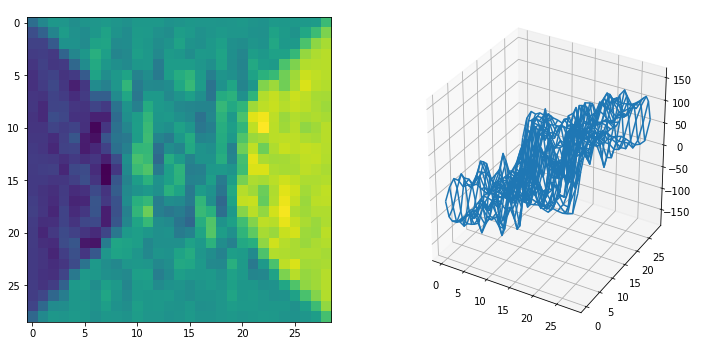

In [15]:
# noise
xder_convolve = signal.convolve2d(noise_array, xder, mode='valid')
satellite(xder_convolve)

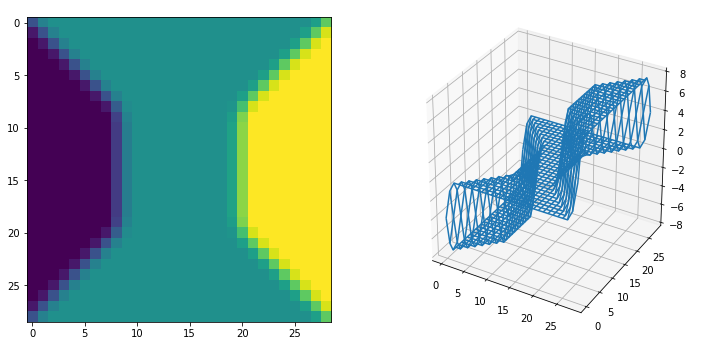

In [16]:
# nuetral
xder_convolve = signal.convolve2d(neutral_array, xder, mode='valid')
satellite(xder_convolve)

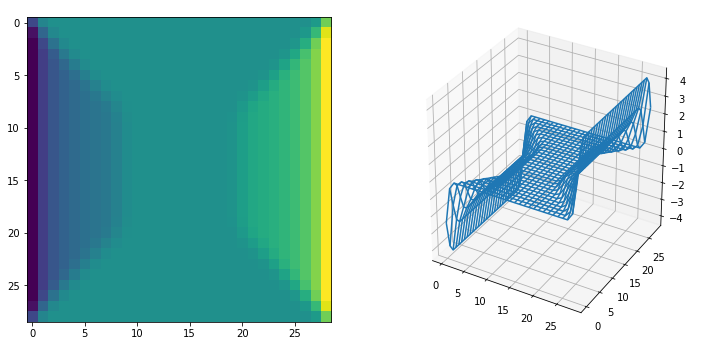

In [17]:
# log
xder_convolve = signal.convolve2d(log_array, xder, mode='valid')
satellite(xder_convolve)

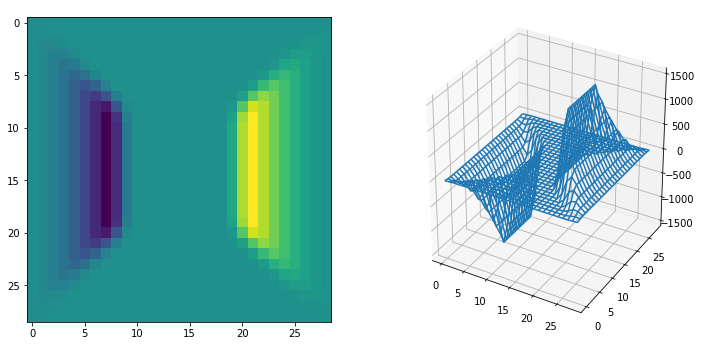

In [18]:
# exp
xder_convolve = signal.convolve2d(exp_array, xder, mode='valid')
satellite(xder_convolve)

### Derivative with Resptect to Y

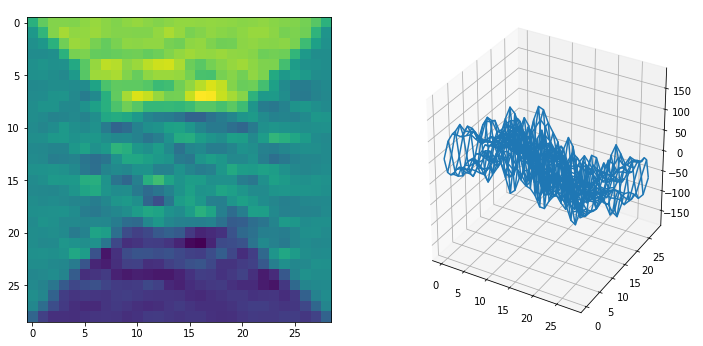

In [19]:
# noise
yder_convolve = signal.convolve2d(noise_array, yder, mode='valid')
satellite(yder_convolve)

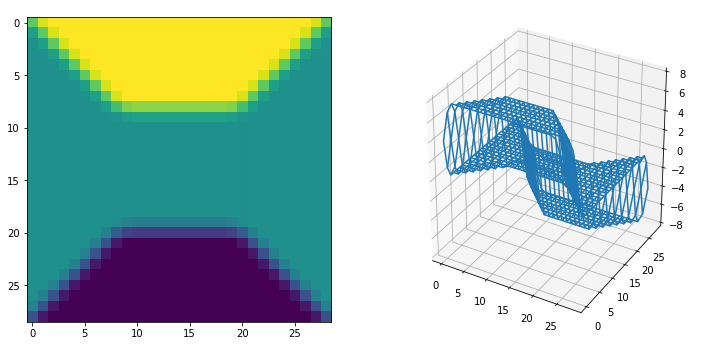

In [20]:
# neutral
yder_convolve = signal.convolve2d(neutral_array, yder, mode='valid')
satellite(yder_convolve)

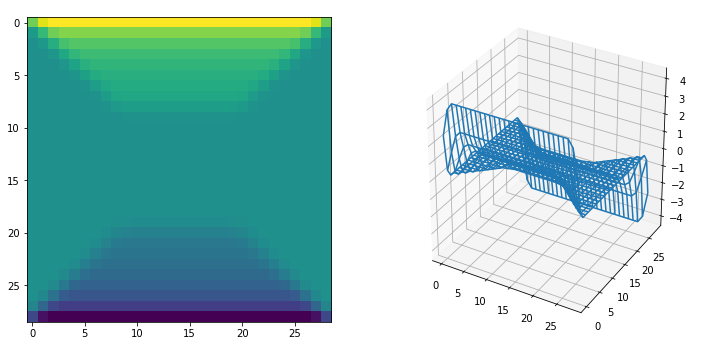

In [21]:
# log
yder_convolve = signal.convolve2d(log_array, yder, mode='valid')
satellite(yder_convolve)

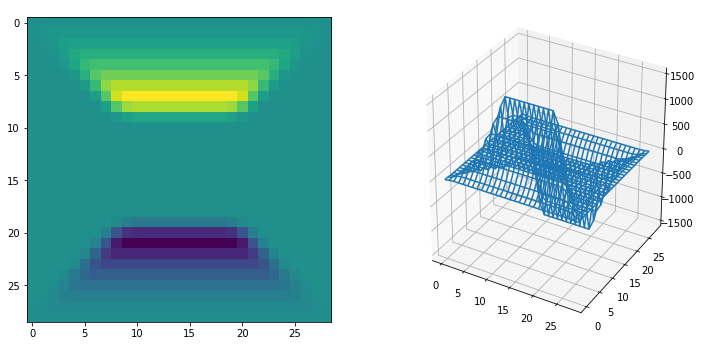

In [22]:
# exp
yder_convolve = signal.convolve2d(exp_array, yder, mode='valid')
satellite(yder_convolve)

### Gradient Magnitude

- 傾きの大きさをあらわす

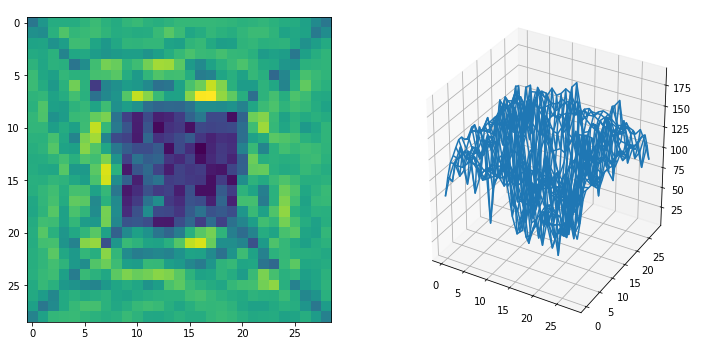

In [23]:
# noise
arrx = signal.convolve2d(noise_array, xder, mode='valid')
arry = signal.convolve2d(noise_array, yder, mode='valid')
gradient_magnitude = np.hypot(arrx, arry)
satellite(gradient_magnitude)

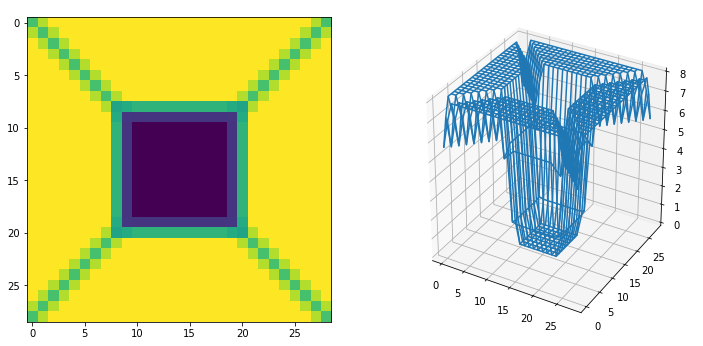

In [24]:
# neutral
arrx = signal.convolve2d(neutral_array, xder, mode='valid')
arry = signal.convolve2d(neutral_array, yder, mode='valid')
gradient_magnitude = np.hypot(arrx, arry)
satellite(gradient_magnitude)

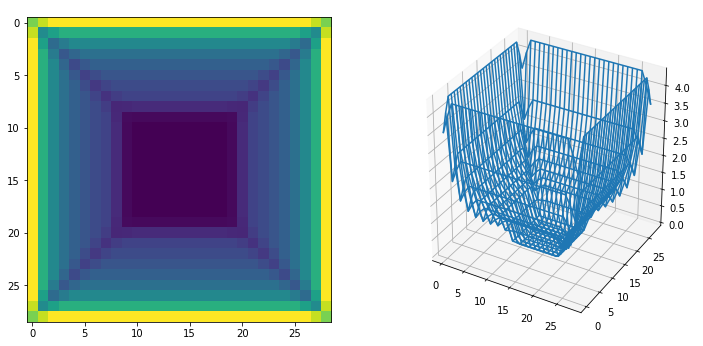

In [25]:
# log
arrx = signal.convolve2d(log_array, xder, mode='valid')
arry = signal.convolve2d(log_array, yder, mode='valid')
gradient_magnitude = np.hypot(arrx, arry)
satellite(gradient_magnitude)

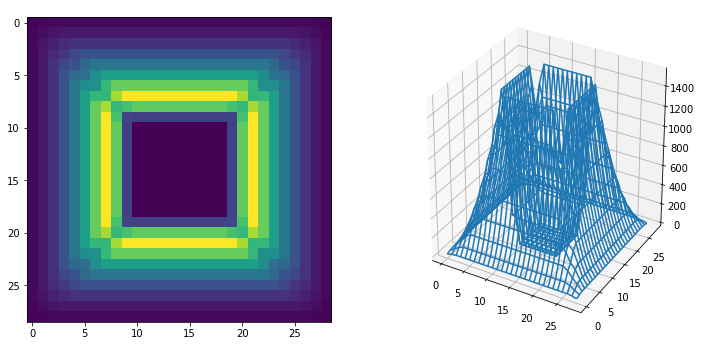

In [26]:
# exp
arrx = signal.convolve2d(exp_array, xder, mode='valid')
arry = signal.convolve2d(exp_array, yder, mode='valid')
gradient_magnitude = np.hypot(arrx, arry)
satellite(gradient_magnitude)

### Second Derivatives to X

- 傾きの変化の割合

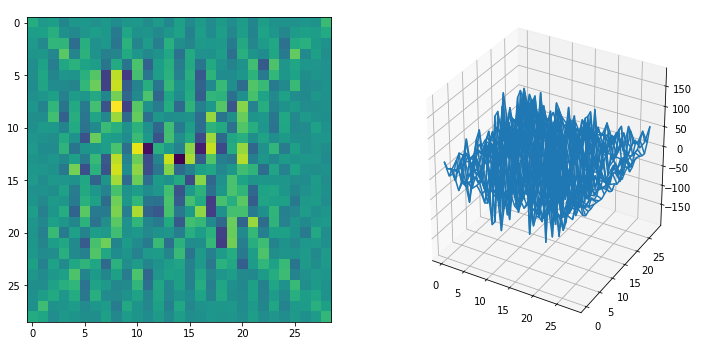

In [27]:
# noise
xder2_convolve = signal.convolve2d(noise_array, xder2, mode='valid')
satellite(xder2_convolve)

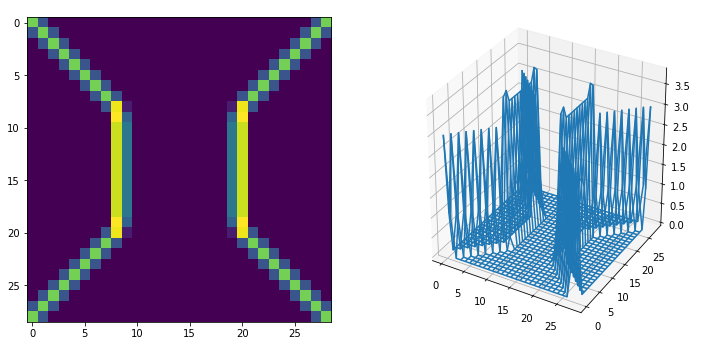

In [28]:
# neutral
xder2_convolve = signal.convolve2d(neutral_array, xder2, mode='valid')
satellite(xder2_convolve)

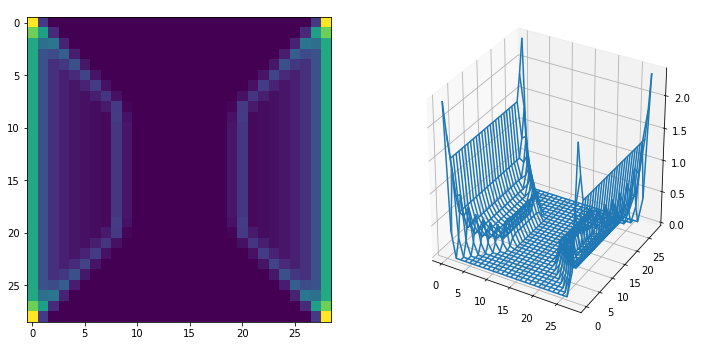

In [29]:
# log
xder2_convolve = signal.convolve2d(log_array, xder2, mode='valid')
satellite(xder2_convolve)

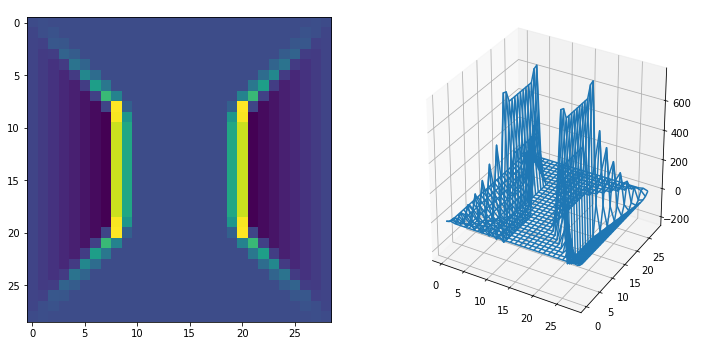

In [30]:
# exp
xder2_convolve = signal.convolve2d(exp_array, xder2, mode='valid')
satellite(xder2_convolve)

### Second Derivatives to Y

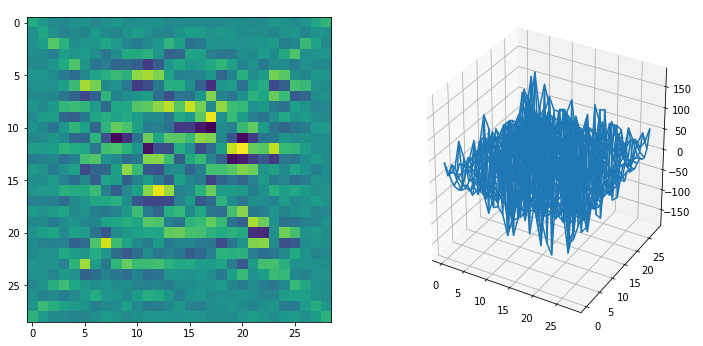

In [31]:
# noise
yder2_convolve = signal.convolve2d(noise_array, yder2, mode='valid')
satellite(yder2_convolve)

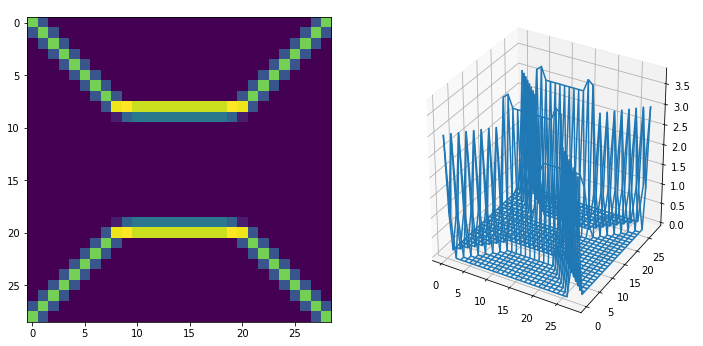

In [32]:
# neutral
yder2_convolve = signal.convolve2d(neutral_array, yder2, mode='valid')
satellite(yder2_convolve)

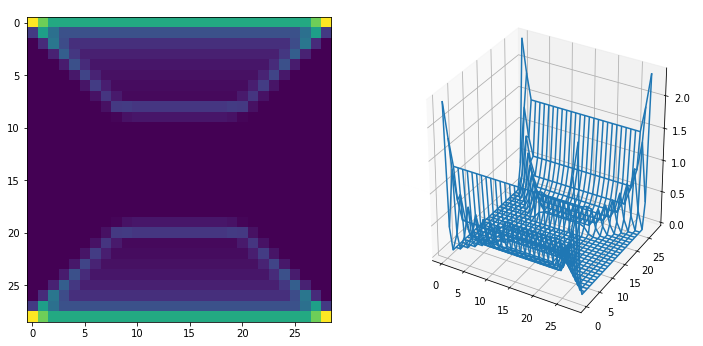

In [33]:
# log
yder2_convolve = signal.convolve2d(log_array, yder2, mode='valid')
satellite(yder2_convolve)

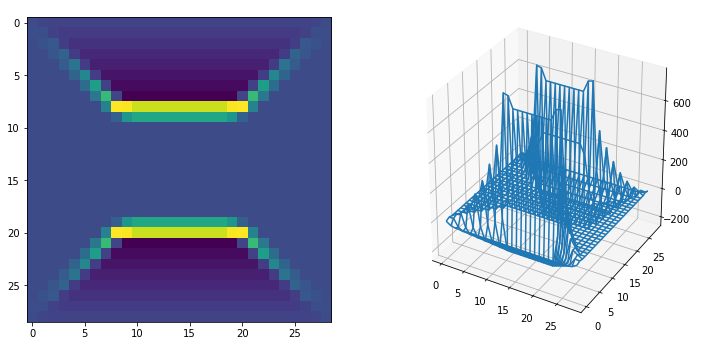

In [34]:
# exp
yder2_convolve = signal.convolve2d(exp_array, yder2, mode='valid')
satellite(yder2_convolve)

### Laplacian

- 勾配の発散
- [ベクトル場を何かの流れだと意識することで，発散はあるエリアから外に向かって出ていく量を表している](https://physics-school.com/grad-div-rot/#toc7)
- ラプラシアン演算、2階の偏微分演算（たわみ、へこみ？、意味わからん）
- 直感イメージ　[参考](https://www.ee.t.u-tokyo.ac.jp/~tanemura/lecture/EM/hosoku/VectorOperators.pdf)

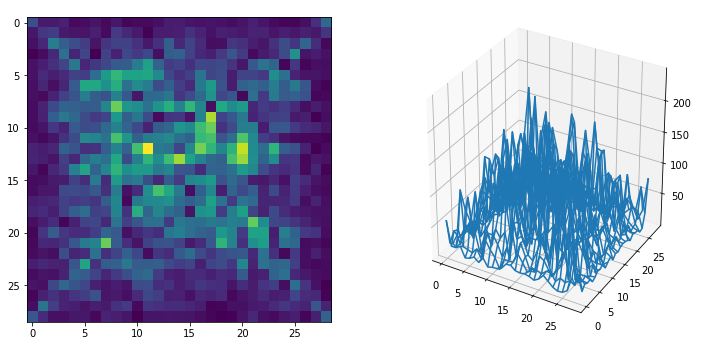

In [35]:
# noise
arrx = signal.convolve2d(noise_array, xder2, mode='valid')
arry = signal.convolve2d(noise_array, yder2, mode='valid')
laplacian = np.hypot(arrx, arry)
satellite(laplacian)

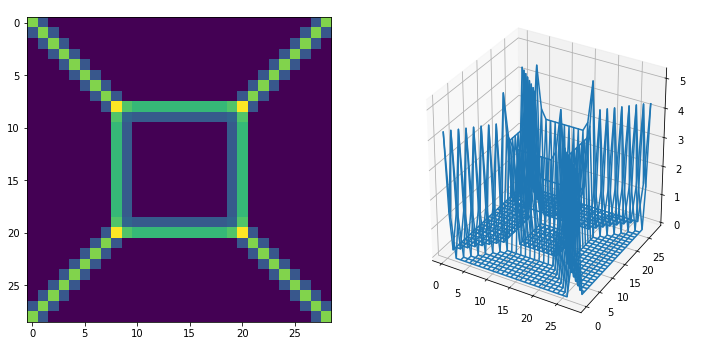

In [36]:
# neutral
arrx = signal.convolve2d(neutral_array, xder2, mode='valid')
arry = signal.convolve2d(neutral_array, yder2, mode='valid')
laplacian = np.hypot(arrx, arry)
satellite(laplacian)

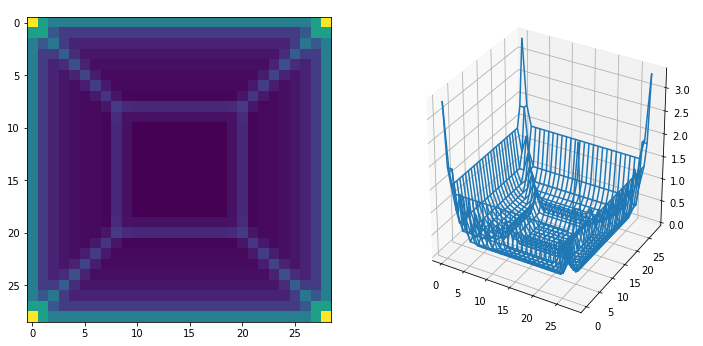

In [37]:
# log
arrx = signal.convolve2d(log_array, xder2, mode='valid')
arry = signal.convolve2d(log_array, yder2, mode='valid')
laplacian = np.hypot(arrx, arry)
satellite(laplacian)

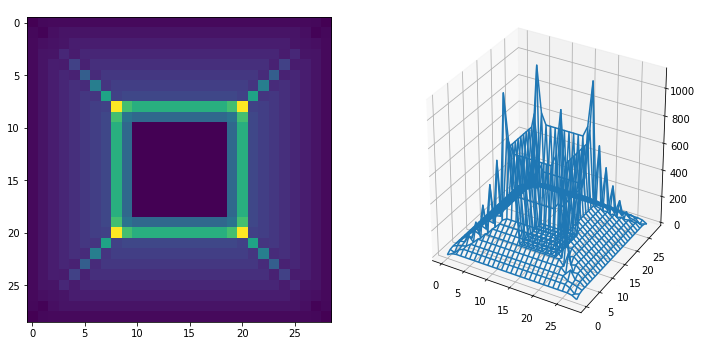

In [38]:
# exp
arrx = signal.convolve2d(exp_array, xder2, mode='valid')
arry = signal.convolve2d(exp_array, yder2, mode='valid')
laplacian = np.hypot(arrx, arry)
satellite(laplacian)

### Magnitude of the Curl of Gradient
- ベクトルの回転？　意味わからん
<div>
<img src="https://slidesplayer.net/slide/17249544/100/images/1/%E3%83%99%E3%82%AF%E3%83%88%E3%83%AB%E9%96%A2%E6%95%B0%E3%81%AE%E5%9B%9E%E8%BB%A2%EF%BC%88%E3%82%AB%E3%83%BC%E3%83%AB%E3%80%81%E3%83%AD%E3%83%BC%E3%83%86%E3%82%A3%E3%82%B7%E3%83%A7%E3%83%B3%EF%BC%89.jpg" width="300" height="300" align="left"/>
</div>

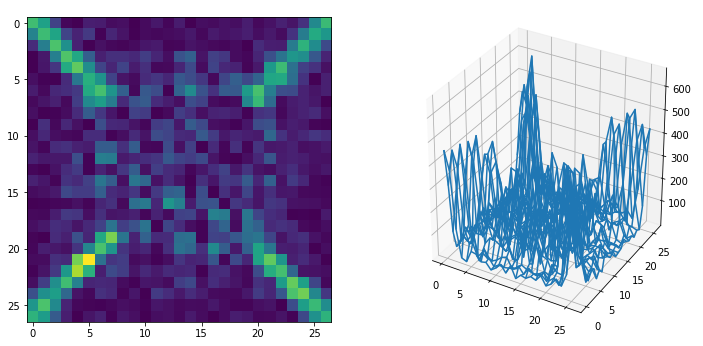

In [39]:
# noise
arrx = signal.convolve2d(noise_array, xder, mode='valid')
arry = signal.convolve2d(noise_array, yder, mode='valid')
arrx = signal.convolve2d(arrx, yder, mode='valid')
arry = signal.convolve2d(arry, xder, mode='valid')
curl = np.hypot(arrx, arry)
satellite(curl)

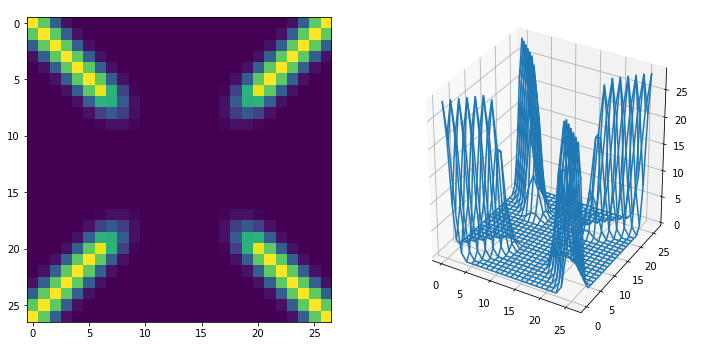

In [40]:
# neutral
arrx = signal.convolve2d(neutral_array, xder, mode='valid')
arry = signal.convolve2d(neutral_array, yder, mode='valid')
arrx = signal.convolve2d(arrx, yder, mode='valid')
arry = signal.convolve2d(arry, xder, mode='valid')
curl = np.hypot(arrx, arry)
satellite(curl)

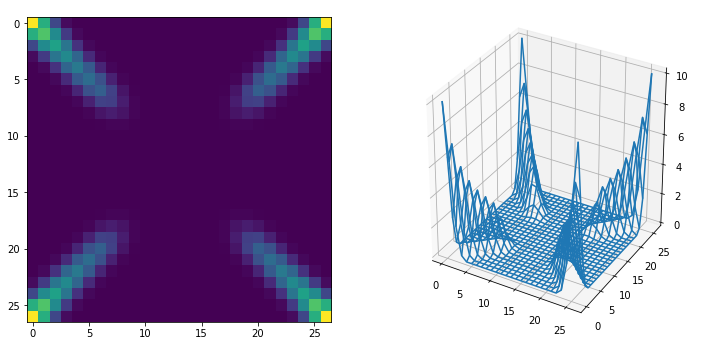

In [41]:
# log
arrx = signal.convolve2d(log_array, xder, mode='valid')
arry = signal.convolve2d(log_array, yder, mode='valid')
arrx = signal.convolve2d(arrx, yder, mode='valid')
arry = signal.convolve2d(arry, xder, mode='valid')
curl = np.hypot(arrx, arry)
satellite(curl)

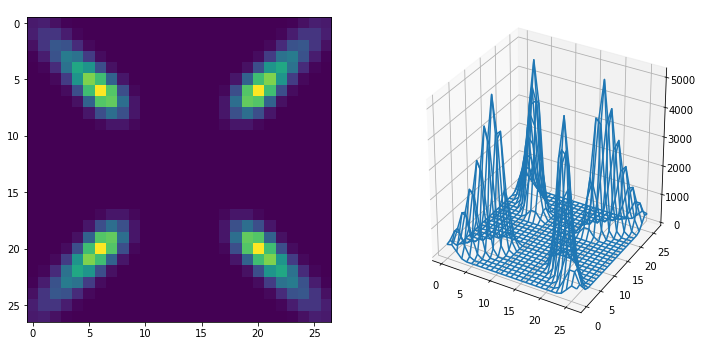

In [42]:
# exp
arrx = signal.convolve2d(exp_array, xder, mode='valid')
arry = signal.convolve2d(exp_array, yder, mode='valid')
arrx = signal.convolve2d(arrx, yder, mode='valid')
arry = signal.convolve2d(arry, xder, mode='valid')
curl = np.hypot(arrx, arry)
satellite(curl)